<a href="https://colab.research.google.com/github/dansojo/Medical_CV/blob/main/MRI_Bias_Field_Correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**목표 : MRI 이미지의 강도 불균형을 보정, 조직의 구조를 명확히 하고 전체적인 밝기 균형을 맞추는 것이 목표**

2. **SimpleITK 사용 이유**


---


SimpleITK는 의료 영상 처리에 특화된 라이브러리로, 다양한 이미지 필터와 전처리 기법을 제공합니다. SimpleITK는 특히 다차원 영상(2D, 3D 등) 및 다양한 데이터 타입을 다루기 용이하며, 의료 영상에서 자주 사용하는 N4 Bias Field Correction을 비롯한 고급 필터를 포함하고 있습니다.

In [2]:
!pip install SimpleITK

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 MB 11.6 MB/s eta 0:00:00


In [13]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

In [11]:
# MRI 이미지 로드

image_path = '/content/drive/MyDrive/Medical_CV/MRI/MRI 이미지/MRI_T1C+.jpeg'
mri_image = io.imread(image_path, as_gray=True)

In [8]:
#  원본 이미지 데이터 확인
print(f"Original mri_image - Min Value: {mri_image.min()}, Max Value: {mri_image.max()}")
print(f"Original mri_image - Data Type: {mri_image.dtype}")
print(f"Original mri_image - Shape: {mri_image.shape}")

Original mri_image - Min Value: 9, Max Value: 255
Original mri_image - Data Type: uint8
Original mri_image - Shape: (630, 630)


In [14]:
# 이미지 데이터 타입을 float32로 변환 (0~1 범위로 정규화)
# SimpleITK의 N4 Bias Field Correction 필터가  unit8 형식의 이미지를 지원하지
# 않기 때문에 16 or 32 bit 의 부동 소수점 형식으로 이미지를 변환해야한다.
mri_image_float = (mri_image / 255.0).astype(np.float32)

In [15]:
# SimpleITK 형식으로 변환 (Bias Field Correction 적용을 위해)
mri_image_sitk = sitk.GetImageFromArray(mri_image_float)

# N4 Bias Field Correction 필터 설정 및 적용

In [16]:
# 필터 생성
corrector = sitk.N4BiasFieldCorrectionImageFilter()

# Bias Field Correction 실행
corrected_image_sitk = corrector.Execute(mri_image_sitk)

# numpy 형식으로 변환
corrected_image = sitk.GetArrayFromImage(corrected_image_sitk)

**필터링 전후 시각화**

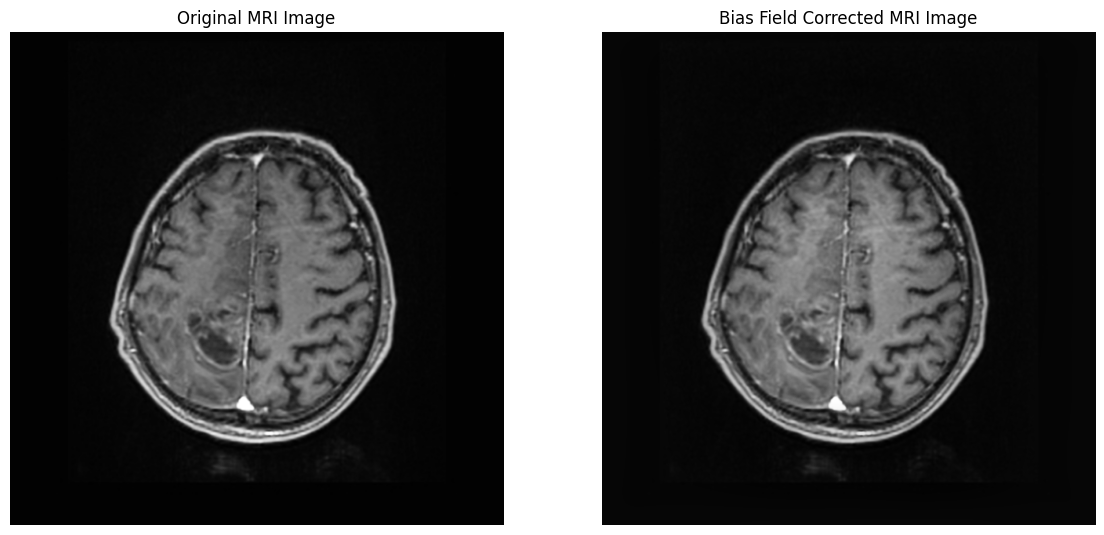

In [17]:
plt.figure(figsize=(14, 7))

# 원본 MRI 이미지
plt.subplot(1, 2, 1)
plt.imshow(mri_image, cmap='gray')
plt.title("Original MRI Image")
plt.axis('off')

# Bias Field 보정된 MRI 이미지
plt.subplot(1, 2, 2)
plt.imshow(corrected_image, cmap='gray')
plt.title("Bias Field Corrected MRI Image")
plt.axis('off')

plt.show()